In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

✅ Imports OK


In [6]:
import kagglehub
path = kagglehub.dataset_download("amisha0528/mall-customers-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\kujoo\.cache\kagglehub\datasets\amisha0528\mall-customers-dataset\versions\1


In [3]:
import pandas as pd
csv_path = path + "/Mall_Customers.csv"
data = pd.read_csv(csv_path)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("First 5 rows of scaled data:\n", X_scaled[:5])

First 5 rows of scaled data:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


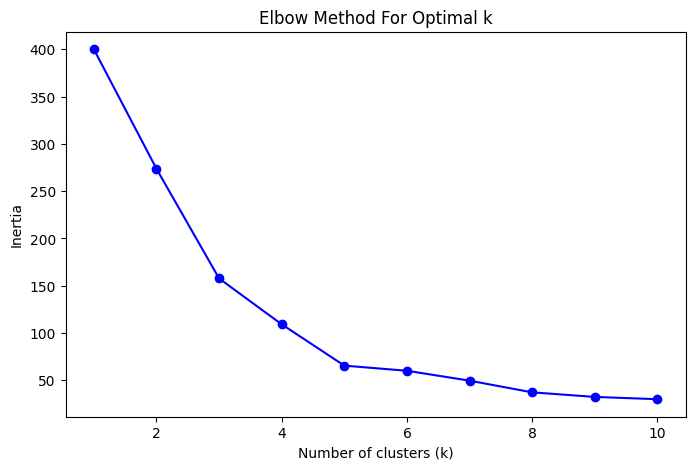

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


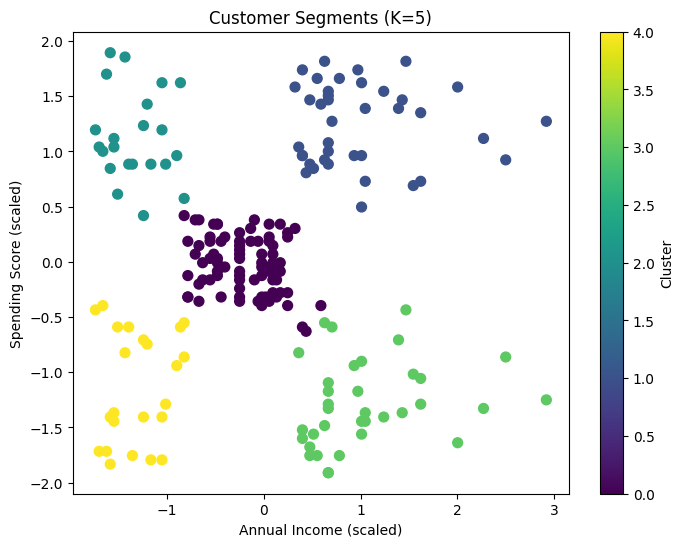

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments (K=5)")
plt.colorbar(label='Cluster')
plt.show()

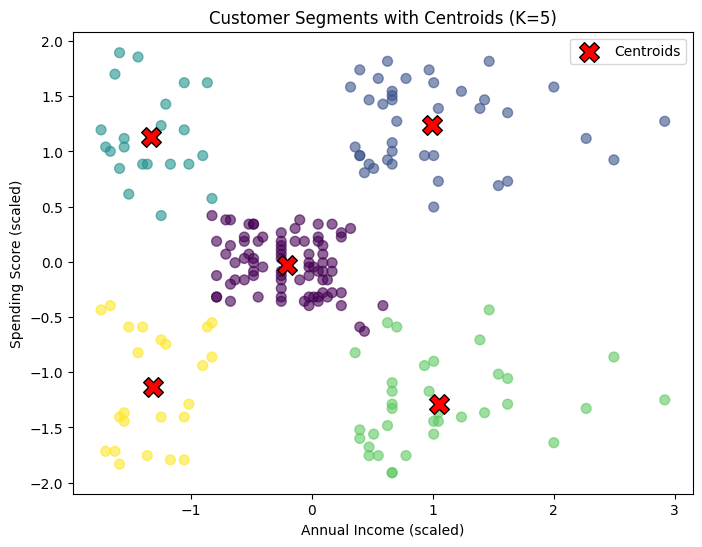

In [11]:
centroids_scaled = kmeans.cluster_centers_
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], c='red', s=200, marker='X', edgecolors='black', label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments with Centroids (K=5)")
plt.legend()
plt.show()